# Exercice 0: Getting Started: standard Hopfield network
## Exercise 0.1

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [143]:
# Set seed for reproducibility
np.random.seed(42)

# Ex 0.1 Implement methods for patterns and network state update
def generate_balanced_random_patterns(N, M):
    return np.array(np.random.choice([-1, 1], (M, N)),dtype=float)


def update_state(S, W, beta=4):
    h = np.dot(W, S)
    return (np.tanh(beta * h))




# Exercise 0.2

In [144]:
def flip_bits(pattern, c):
    flip_indices = np.random.choice(len(pattern), size=int(len(pattern) * c), replace=False)
    pattern_flipped = pattern.copy()
    pattern_flipped[flip_indices] *= -1
    
    return pattern_flipped


def compute_overlap(state, patterns):
    return np.dot(patterns, state) / len(state)

def run_standard_hopfield_network(N, M, T):
    patterns = generate_balanced_random_patterns(N, M)
    W = 1/N * np.dot(patterns.T, patterns)  
    # Set initial state close to the first pattern
    initial_state = flip_bits(patterns[0], c=0.05)
    # Let the network evolve
    state = initial_state
    for t in range(T):  # Simulate for 20 time steps
            state = update_state(state, W)
            overlaps = compute_overlap(state, patterns)
            #print(f"Time step {t}, Overlaps: {overlaps}")
    
    return state, patterns
    
def plot_standard_hopfield_network_results(M, state, patterns):
    fig, ax = plt.subplots(nrows=M, ncols=2, figsize=(12, 12))
    # Display the original pattern
    for i in range(M):
        ax[i, 0].imshow(patterns[i].reshape(10, 10), cmap='binary', vmin=-1, vmax=1)
        ax[i, 0].set_title(f'Original Pattern {i+1}')
        ax[i, 0].axis('off')  # Hide grid lines and ticks for clarity
        # Display the retrieved pattern
        ax[i, 1].imshow(state.reshape(10, 10), cmap='binary', vmin=-1, vmax=1)
        ax[i, 1].set_title(f'Retrieved Pattern {i+1}')
        ax[i, 1].axis('off')  # Hide grid lines and ticks for clarity
    plt.suptitle('Comparison of Original and Retrieved Patterns')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


In [145]:

N = 100
M = 5
T = 10
start_time = time.time()
state, patterns = run_standard_hopfield_network(N,M,T)
print("Computational cost:", time.time() - start_time, "seconds")
plot_standard_hopfield_network_results(M,state,patterns)

Computational cost: 0.004003047943115234 seconds


# Exercise 1: Storage capacity in the standard Hopfield network
## Exercise 1.1

In [146]:
def update_state_with_overlaps(S, patterns, beta=4):
    N = len(S)
    m = np.dot(patterns, S) / N
    h = np.zeros_like(S, dtype=float)

    for i in range(N):
        h[i] = np.sum(m * patterns[:, i])

    return np.tanh(beta * h)

def run_standard_hopfield_network_with_overlaps(N, M, T):
    patterns = generate_balanced_random_patterns(N, M)
    W = 1/N * np.dot(patterns.T, patterns)
    # Set initial state close to the first pattern
    initial_state = flip_bits(patterns[0], c=0.05)
    # Let the network evolve
    state = initial_state
    for t in range(T):  # Simulate for 20 time steps
        state = update_state_with_overlaps(state,patterns)


    return state, patterns

In [147]:
start_time = time.time()
N = 100
M = 5
T = 10
_,_ = run_standard_hopfield_network_with_overlaps(N,M,T)
print("Computational cost of single update step:", time.time() - start_time, "seconds")
start_time = time.time()
_,_ = run_standard_hopfield_network(N,M,T)
print("Computational cost of standard update step:", time.time() - start_time, "seconds")

Computational cost of single update step: 0.007510662078857422 seconds
Computational cost of standard update step: 0.001001119613647461 seconds


## Exercise 1.2

In [148]:
def hamming_distance(P1, P2):
    return (len(P1) - np.dot(P1, P2)) / (2 * len(P1))

## Exercise 1.3

In [151]:
# Parameters

def run_standard_hopfield_network_with_hamming_distance(N,M,T):
    patterns = generate_balanced_random_patterns(N, M)
    initial_state = flip_bits(patterns[0], c=0.15)
    state = initial_state
    distances = []
    
    # Simulate the network
    for t in range(T):
        state = update_state_with_overlaps(state, patterns)  # Example overlap
        distances.append([hamming_distance(state, p) for p in patterns])
        overlaps = compute_overlap(state, patterns)
        print(f"Time step {t}, Overlaps: {overlaps}")
    
    return np.array(distances,dtype=float), state, patterns
    
def plot_patterns_state_comparison_hamming_distances(distances,M, state,patterns):

    fig, ax = plt.subplots(nrows=M, ncols=2, figsize=(12, 12))
    
    for i in range(M):
        # Display the original pattern
        ax[i, 0].imshow(patterns[i].reshape(15, 20), cmap='binary', vmin=-1, vmax=1)
        ax[i, 0].set_title(f'Original Pattern {i+1}')
        ax[i, 0].axis('off')  # Hide grid lines and ticks for clarity
    
        # Display the retrieved pattern (assuming final state resembles the first pattern)
        ax[i, 1].imshow(state.reshape(15, 20), cmap='binary', vmin=-1, vmax=1)
        ax[i, 1].set_title(f'Retrieved Pattern {i+1}')
        ax[i, 1].axis('off')  # Hide grid lines and ticks for clarity
    
    # Add a super title and show the plot for patterns
    plt.suptitle('Comparison of Original and Retrieved Patterns')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    
    # Plot Hamming distances
    plt.figure(figsize=(10, 5))
    for i in range(M):
        plt.plot(distances[:, i], label=f'Pattern {i+1}')
    plt.xlabel('Time step')
    plt.ylabel('Hamming distance')
    plt.title('Evolution of Hamming Distances Over Time')
    plt.legend()
    plt.show()

In [152]:
N = 300
M = 5
T = 10
distances, state, patterns = run_standard_hopfield_network_with_hamming_distance(N,M,T)
plot_patterns_state_comparison_hamming_distances(distances, M, state, patterns)

Time step 0, Overlaps: [ 0.99012837  0.13971813  0.01806381 -0.01377505  0.04181555]
Time step 1, Overlaps: [ 0.99886991  0.13417569  0.02004522 -0.01340529  0.04029904]
Time step 2, Overlaps: [ 0.99898252  0.13407051  0.02005789 -0.01339363  0.04025969]
Time step 3, Overlaps: [ 0.99898413  0.13406893  0.02005792 -0.01339345  0.040259  ]
Time step 4, Overlaps: [ 0.99898416  0.13406891  0.02005792 -0.01339345  0.04025899]
Time step 5, Overlaps: [ 0.99898416  0.13406891  0.02005792 -0.01339345  0.04025899]
Time step 6, Overlaps: [ 0.99898416  0.13406891  0.02005792 -0.01339345  0.04025899]
Time step 7, Overlaps: [ 0.99898416  0.13406891  0.02005792 -0.01339345  0.04025899]
Time step 8, Overlaps: [ 0.99898416  0.13406891  0.02005792 -0.01339345  0.04025899]
Time step 9, Overlaps: [ 0.99898416  0.13406891  0.02005792 -0.01339345  0.04025899]


## Exercise 1.4

In [165]:
def pattern_retrieval_error_and_count(patterns, N, T=50, beta=4):
    retrieval_errors = []
    retrieval_counts = []
    for pattern in patterns:
        initial_state = flip_bits(pattern, c=0.05)
        state = initial_state
        for t in range(T):
            state = update_state_with_overlaps(state, patterns, beta)
        retrieval_errors.append(hamming_distance(pattern, state))
        retrieval_counts.append(hamming_distance(pattern, state) <= 0.05)
    return np.mean(retrieval_errors), np.std(retrieval_errors), np.sum(retrieval_counts)

# Run simulations for different dictionary initializations
def run_simulation_dictionary(M, N=300, iterations=5,beta=4):
    mean_errors = []
    std_errors = []
    pattern_counts = []
    for _ in range(iterations):
        patterns = generate_balanced_random_patterns(N, M)
        mean_error, std_error, count = pattern_retrieval_error_and_count(patterns, N, beta=beta)
        mean_errors.append(mean_error)
        std_errors.append(std_error)
        pattern_counts.append(count)
    return np.mean(mean_errors), np.mean(std_errors), np.mean(pattern_counts)

In [166]:
mean_error, std_error, avg_retrieved = run_simulation_dictionary(5)
print(f"Mean error: {mean_error}, STD of error: {std_error}, Average retrieved patterns: {avg_retrieved}")


Mean error: 0.0004247768483587152, STD of error: 4.450800531875187e-05, Average retrieved patterns: 5.0


## Exercise 1.5

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


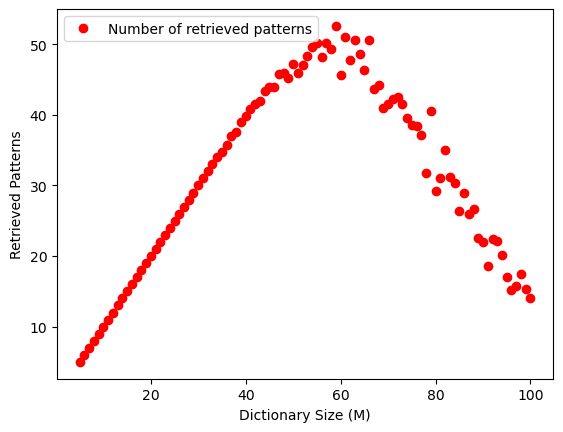

In [158]:
dict_sizes = range(5, 101, 1)  # Example range
errors = []
stds = []
retrievals = []

for M in dict_sizes:
    print(M)
    mean_error, std_error, avg_retrieved = run_simulation_dictionary(M)
    errors.append(mean_error)
    stds.append(std_error)
    retrievals.append(avg_retrieved)

# Plotting the results
plt.errorbar(dict_sizes, errors, yerr=stds, fmt='ro', label='Error of pattern retrieval')
plt.xlabel('Dictionary Size (M)')
plt.ylabel('Error')
plt.legend()
plt.show()

plt.plot(dict_sizes, retrievals, 'ro', label='Number of retrieved patterns')
plt.xlabel('Dictionary Size (M)')
plt.ylabel('Retrieved Patterns')
plt.legend()
plt.show()

In [159]:
retrievals

[5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 34.8,
 35.8,
 37.0,
 37.6,
 39.0,
 39.8,
 40.8,
 41.6,
 42.0,
 43.4,
 44.0,
 44.0,
 45.8,
 46.0,
 45.2,
 47.2,
 46.0,
 47.0,
 48.4,
 49.6,
 50.2,
 48.2,
 50.2,
 49.4,
 52.6,
 45.6,
 51.0,
 47.8,
 50.6,
 48.6,
 46.4,
 50.6,
 43.6,
 44.2,
 41.0,
 41.6,
 42.2,
 42.6,
 41.6,
 39.6,
 38.6,
 38.4,
 37.2,
 31.8,
 40.6,
 29.2,
 31.0,
 35.0,
 31.2,
 30.4,
 26.4,
 29.0,
 26.0,
 26.6,
 22.6,
 22.0,
 18.6,
 22.4,
 22.2,
 20.2,
 17.0,
 15.2,
 15.8,
 17.4,
 15.4,
 14.0]

## Exercise 1.6

In [ ]:
# Ex 1.6 Maximal number of patterns Mmax and retrieval errors beyond Mmax
# This is determined from the plot generated in Ex 1.5, where the number of retrieved patterns starts to decrease
# significantly, and the error increases. This is usually where the network capacity C is reached.
# Mmax is the dictionary size M for which the number of retrieved patterns is maximized before the network's performance
# begins to degrade.



## Exercise 1.7

50
100
300
500
800


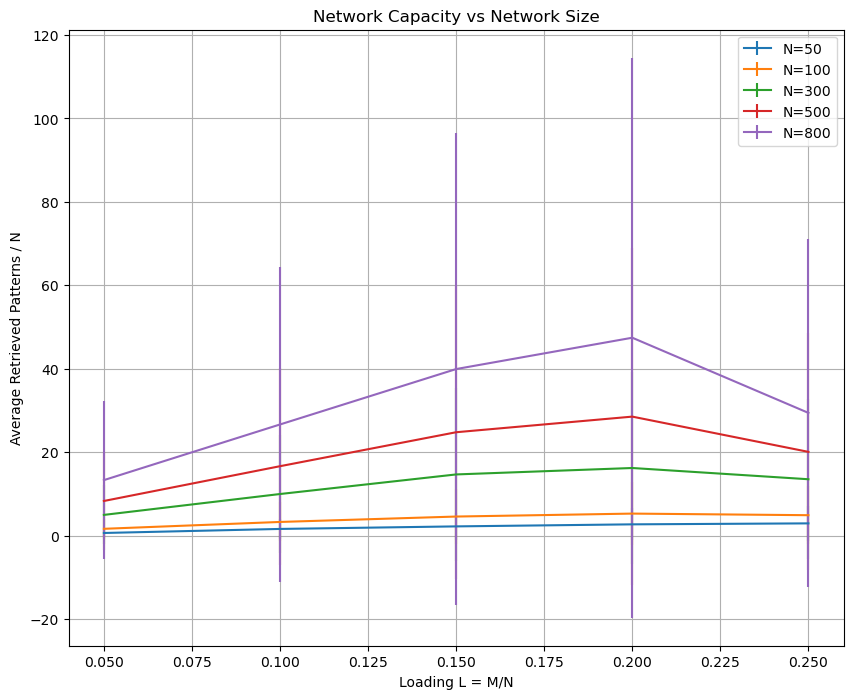

In [161]:
def capacity_study(N_values, loading_values, trials=10):
    """Study the capacity of Hopfield networks across different sizes and loadings."""
    results = {N: [] for N in N_values}

    for N in N_values:
        print(N)
        for L in loading_values:
            M = int(L * N)
            retrieval_rates = [run_simulation_dictionary(M, N) for _ in range(trials)]
            mean_retrieval_rate = np.mean(retrieval_rates)
            std_retrieval_rate = np.std(retrieval_rates)
            results[N].append((mean_retrieval_rate, std_retrieval_rate))

    # Plotting the results
    plt.figure(figsize=(10, 8))
    for N in N_values:
        means, stds = zip(*results[N])
        plt.errorbar(loading_values, means, yerr=stds, label=f'N={N}')

    plt.xlabel('Loading L = M/N')
    plt.ylabel('Average Retrieved Patterns / N')
    plt.title('Network Capacity vs Network Size')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
N_values = [50, 100, 300, 500, 800]
loading_values = [0.05, 0.1, 0.15, 0.2, 0.25]
capacity_study(N_values, loading_values)

## Exercice 1.8

In [168]:
def plot_beta_impact(N, M, beta_values):
    """ Plot the impact of beta on network retrieval capacity. """
    _,_,retrieval_rates = [run_simulation_dictionary(N, M, beta=beta) for beta in beta_values]

    plt.figure(figsize=(8, 5))
    plt.plot(beta_values, retrieval_rates, marker='o')
    plt.xlabel('Inverse Temperature Beta')
    plt.ylabel('Retrieval Rate')
    plt.title('Impact of Beta on Memory Retrieval')
    plt.grid(True)
    plt.show()

# Parameters
N = 300  # Number of neurons
M = 5    # Number of patterns
beta_values = np.linspace(0.1, 10, 20)  # Range of beta values to test

plot_beta_impact(N, M, beta_values)

ValueError: too many values to unpack (expected 3)

# Exercise 2 Low-activity patterns
## Exercise 2.1

In [ ]:
# Ex 2.1 Equivalence of the standard Hopfield model to low-activity patterns
# This is a theoretical question that requires analyzing the model equations and comparing the models.
# You would need to write down the expressions and compare them to find the values of a, b, and θ that make the models equivalent.



## Exercise 2.2

In [46]:
def generate_low_activity_patterns(N, M, activity):
    """
    Generate M low-activity patterns with N neurons each,
    where each neuron has a probability 'activity' of being 1.
    """
    return np.random.choice([0, 1], (M, N), p=[1-activity, activity])

def hamming_distance(P, Q):
    """
    Compute the Hamming distance between two patterns.
    """
    return np.sum(P != Q) / len(P)

def stochastic_spike_variable(S):
    """
    Generate a stochastic spike variable for each neuron based on its state S.
    Probability is derived from the neuron's continuous value.
    """
    return np.random.binomial(1, 0.5 * (S + 1))

def compute_overlaps(patterns, S, a, N):
    """
    Compute the overlaps m_mu for each pattern.
    """
    M = patterns.shape[0]
    overlaps = np.zeros(M,dtype=float)
    for mu in range(M):
        overlaps[mu] = np.sum((patterns[mu] - a) * S) / N
    return overlaps

def update_states_with_overlaps(S, patterns, overlaps, c, theta, beta, N, a):
    """
    Update the states of the network based on overlaps and pattern influence.
    """
    H = np.zeros_like(S,dtype=float)
    M = patterns.shape[0]
    for mu in range(M):
        H += c * overlaps[mu] * (patterns[mu] - a)
    H /= N
    H -= theta
    return np.tanh(beta * H)

def run_simulation_low_activity(N, M, a, b, theta_values, beta, T, c=2):
    """
    Run the simulation for multiple theta values and plot the retrieval accuracy.
    """
    patterns = generate_low_activity_patterns(N, M, a)
    initial_state = patterns[0].copy()  # Initialize the state close to the first pattern
    hamming_distances = []
    print(theta_values)
    for theta in theta_values:
        
        S = initial_state.copy()
        for t in range(T):
            overlaps = compute_overlaps(patterns, S, a, N)
            S = update_states_with_overlaps(S, patterns, overlaps, c, theta, beta, N, a)
            S = np.array([stochastic_spike_variable(si) for si in S])
        # Evaluate performance after the last update
        distances = [hamming_distance(S, p) for p in patterns]
        mean_distance = np.mean(distances)
        hamming_distances.append(mean_distance)

    return theta_values, hamming_distances

In [48]:
N = 300  # neurons
M = 5    # patterns
a = 0.1  # activity level
b = 0.1  # parameter for weight calculation
theta = [0.5]  # neuronal firing threshold
beta = 4  # inverse temperature
T = 20   # time steps

final_state = run_simulation_low_activity(N, M, a, b, theta, beta, T)
print(final_state)

[0.5]
([0.5], [0.098])


In [ ]:
# Ex 2.3 Compute the capacity of the network with N=300 and low-activity patterns
# You would need to run simulations similar to the previous exercises to estimate the network's capacity.



[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]


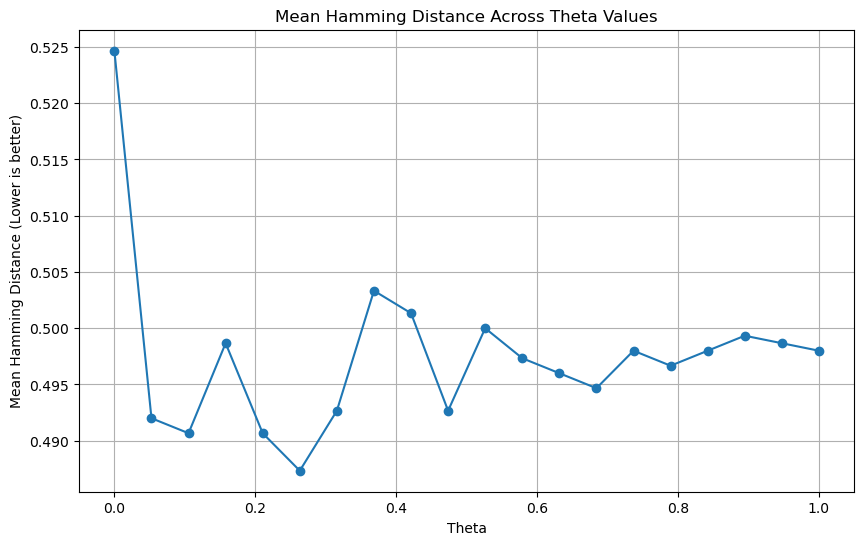

In [50]:
# Ex 2.4 Find the threshold θ that corresponds to the best capacity for a=b=0.5
# This involves running simulations over a range of θ values and observing which one results in the highest capacity.

N = 300  # Number of neurons
M = 5    # Number of patterns
a = 0.5  # Activity level
theta_values = np.linspace(0, 1, 20)  # Range of theta values to test
beta = 4  # Inverse temperature
T = 20   # Time steps

# Run the simulation
theta_vals, mean_distances = run_simulation_low_activity(N, M, a, a, theta_values, beta, T)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(theta_vals, mean_distances, marker='o')
plt.title('Mean Hamming Distance Across Theta Values')
plt.xlabel('Theta')
plt.ylabel('Mean Hamming Distance (Lower is better)')
plt.grid(True)
plt.show()

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]


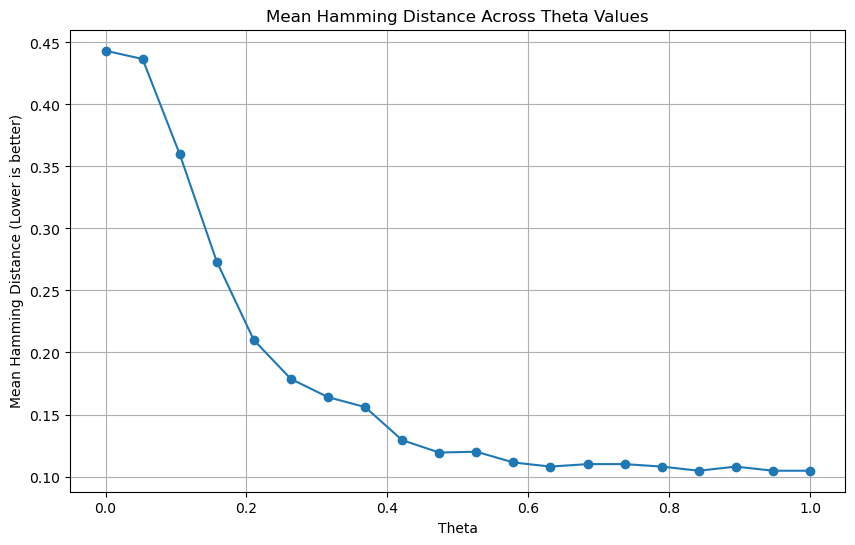

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]


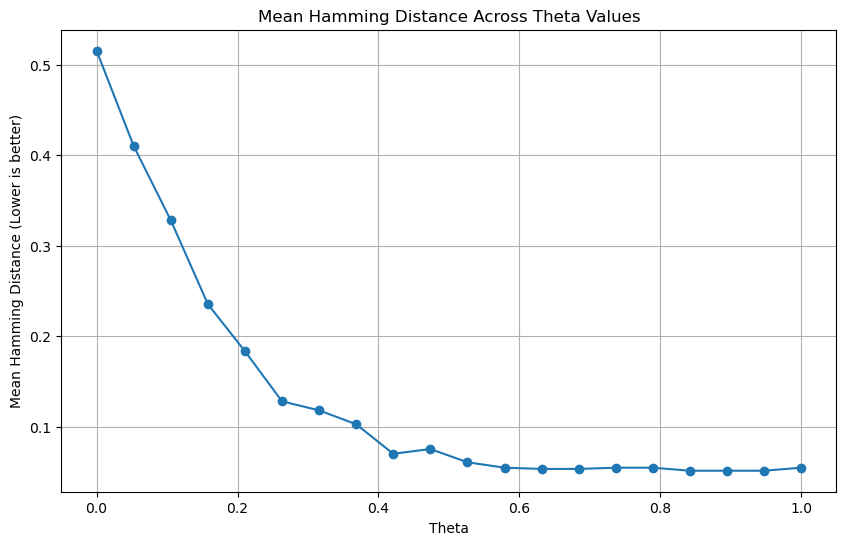

In [51]:
a = 0.1  # Activity level

theta_vals, mean_distances = run_simulation_low_activity(N, M, a, a, theta_values, beta, T)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(theta_vals, mean_distances, marker='o')
plt.title('Mean Hamming Distance Across Theta Values')
plt.xlabel('Theta')
plt.ylabel('Mean Hamming Distance (Lower is better)')
plt.grid(True)
plt.show()

a = 0.05  # Activity level

theta_vals, mean_distances = run_simulation_low_activity(N, M, a, a, theta_values, beta, T)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(theta_vals, mean_distances, marker='o')
plt.title('Mean Hamming Distance Across Theta Values')
plt.xlabel('Theta')
plt.ylabel('Mean Hamming Distance (Lower is better)')
plt.grid(True)
plt.show()

In [ ]:
# Ex 2.5 Repeat for different values of a and b for low-activity cases
# Similar to Ex 2.4, you would vary a and b and run simulations to find the optimal θ and the corresponding capacity.


In [54]:

# Ex 2.6 Experiment with asymmetric connectivities by varying the value of b
# Yet again, this would involve simulations where you vary b and measure the network's capacity, looking for the optimal combination of b and θ.

# Below is an example simulation loop for Ex 2.3
def simulate_capacity(N, M, activity, theta, beta=4, iterations=100):
    patterns = generate_low_activity_patterns(N, M, activity)
    retrieved_patterns = 0

    for _ in range(iterations):
        initial_state = np.random.choice([0, 1], N, p=[1-activity, activity])
        state = initial_state

        for t in range(20):  # Run for a certain number of time steps
            state = update_states_with_overlaps(state, patterns, activity, activity, [theta], beta,N,0.1)

        # Check if the first pattern is retrieved
        if hamming_distance(state, patterns[0]) <= 0.05:
            retrieved_patterns += 1

    return retrieved_patterns / iterations

# Example simulation with specific parameters
N = 300
M = 5
activity = 0.1
theta = 0.1  # This would be varied to find the optimal value
retrieval_rate = simulate_capacity(N, M, activity, theta)
print(f"Retrieval rate: {retrieval_rate}")


TypeError: 'float' object is not subscriptable

# Exercice 3

In [ ]:
import numpy as np

# Ex 3.1 Write down the total input to an excitatory and an inhibitory neuron
# This is a theoretical question that requires expressing the total input in terms of the model parameters.
# You would need to write the expressions based on the equations provided in the document.



In [70]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_weights(N_exc, N_inh, patterns, c):
    """ Initialize weight matrices for E-E and E-I connections """
    W_EE = np.zeros((N_exc, N_exc), dtype=float)
    W_IE = np.zeros((N_inh, N_exc),dtype=float)
    for pattern in patterns:
        W_EE += np.outer(pattern, pattern)
    W_EE *= c / N_exc
    W_IE.fill(1.0 / N_exc)  # Simplified for demonstration
    return W_EE, W_IE

def update_network_synchronous(S_exc, S_inh, W_EE, W_IE, beta):
    """ Perform synchronous update of the network """
    H_exc = np.dot(W_EE, S_exc) - np.dot(W_IE.T, S_inh)
    H_inh = np.dot(W_IE, S_exc)
    S_exc = np.tanh(beta * H_exc)
    S_inh = np.tanh(beta * H_inh)
    return S_exc, S_inh

def simulate_network(N_exc, N_inh, M_values, a, c, beta, T):
    """ Simulate the network across a range of M values to study storage capacity. """
    retrieval_threshold = 0.05  # Define a threshold for considering a pattern successfully retrieved
    loadings = []
    retrieval_rates = []

    for M in M_values:
        patterns = np.random.choice([0, 1], (M, N_exc), p=[1-a, a])
        patterns = np.array(patterns,dtype=float)
        print(patterns)
        print(type(patterns))
        W_EE, W_IE = initialize_weights(N_exc, N_inh, patterns, c)
        S_exc = np.random.choice([0, 1], N_exc)  # Random initial state for excitatory neurons
        S_inh = np.random.choice([0, 1], N_inh)  # Random initial state for inhibitory neurons
        retrieval_count = 0

        for pattern in patterns:
            S_exc_current = pattern.copy()  # Initialize S_exc with the pattern
            S_inh_current = S_inh.copy()
            for _ in range(T):
                S_exc_current, S_inh_current = update_network_synchronous(S_exc_current, S_inh_current, W_EE, W_IE, beta)
            print(S_exc_current, S_inh_current)
            if hamming_distance(S_exc_current, pattern) <= retrieval_threshold:
                retrieval_count += 1

        retrieval_rate = retrieval_count / M
        retrieval_rates.append(retrieval_rate)
        loadings.append(M / N_exc)

    return loadings, retrieval_rates

In [71]:
N_exc = 300  # Number of excitatory neurons
N_inh = 100  # Number of inhibitory neurons
M_values = range(5, 155, 10)  # Various numbers of patterns to store and test
a = 0.1  # Activity level of the patterns
c = 1.0  # Scaling factor for weights
beta = 2  # Inverse temperature for the tanh function
T = 20   # Number of time steps

# Run the simulation
loadings, retrieval_rates = simulate_network(N_exc, N_inh, M_values, a, c, beta, T)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(loadings, retrieval_rates, marker='o')
plt.title('Storage Capacity vs. Loading (L = M/N_exc)')
plt.xlabel('Loading (L)')
plt.ylabel('Retrieval Rate (Fraction of Patterns Retrieved)')
plt.grid(True)
plt.show()

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
<class 'numpy.ndarray'>
[0.52212919 0.45474908 0.48725573 0.45474908 0.45474908 0.45474908
 0.45474908 0.45474908 0.49107688 0.45474908 0.49361899 0.48784648
 0.45474908 0.45474908 0.45474908 0.49361899 0.49361899 0.52269265
 0.49361899 0.48725573 0.49143732 0.45474908 0.45474908 0.48784648
 0.45474908 0.45474908 0.45474908 0.49361899 0.48784648 0.49143732
 0.48784648 0.45474908 0.45474908 0.45474908 0.45474908 0.45474908
 0.49107688 0.49143732 0.45474908 0.52819695 0.52512713 0.48784648
 0.52247468 0.49143732 0.45474908 0.49107688 0.49107688 0.52212919
 0.52269265 0.49361899 0.45474908 0.49361899 0.45474908 0.45474908
 0.49143732 0.45474908 0.45474908 0.52853942 0.45474908 0.45474908
 0.45474908 0.45474908 0.49107688 0.48725573 0.48725573 0.45474908
 0.45474908 0.48784648 0.52819695 0.45474908 0.45474908 0.45474908
 0.45474908 0.45474908 0.45474908 0.45474908 0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[-0.46391623 -0.97971638 -0.57990096 -0.78261826 -0.93313587 -0.85720951
 -0.95953122 -0.92470454 -0.97789758 -0.7746486  -0.94622239 -0.91501105
 -0.89931216 -0.93452241 -0.9824711  -0.89071061 -0.91658915 -0.97257518
 -0.99561666 -0.90103065 -0.64119602 -0.98946499 -0.99220543 -0.92256447
 -0.9550877  -0.80515085 -0.9689733  -0.97689666 -0.98793744 -0.90373288
 -0.96732953 -0.93334929 -0.82889716 -0.94644346 -0.93709106 -0.98762756
 -0.93145108 -0.90430529 -0.91302405 -0.90223583 -0.95142221 -0.99734953
 -0.98361095 -0.85695153 -0.79690128 -0.62995443 -0.97995329 -0.9295722
 -0.66139723 -0.87468932 -0.98324283 -0.97069531 -0.99406585 -0.69998299
 -0.86412879 -0.91753677 -0.94419979 -0.96882916 -0.91693912 -0.98442326
 -0.98132743 -0.96088212 -0.99344123 -0.98386567 -0.92620573 -0.92813285
 -0.65899699 -0.96804842 -0.90525915 -0.98269539 -0.99570516 -0.84323956
 -0.93969687 -0.96088462 -0.93044181 -0.6798101  -0.9508801  -0.91050004
 -0.96314491 -0.99485159 -0.9321127  -0.97759217 -0.

In [ ]:
# Ex 3.2 Write a method for simulating the new model
def simulate_separate_inhibitory_population(N, NI, M, K, T, a, theta, beta=4, synchronous_update=True):
    # Initialize pattern matrix with low activity a
    patterns = np.random.choice([0, 1], (M, N), p=[1-a, a])

    # Initialize weights for excitatory to excitatory
    W_EE = (1/N) * patterns.T @ patterns

    # Initialize weights for inhibitory to excitatory and vice versa
    W_IE = (1/K) * np.ones((N, NI))
    W_EI = (a / NI) * np.ones((NI, N))

    # Initialize states for excitatory and inhibitory neurons
    S_E = np.random.choice([0, 1], N, p=[1-a, a])
    S_I = np.zeros(NI)

    # Initialize history of states for plotting
    history = np.zeros((T, N))

    for t in range(T):
        # Compute input to inhibitory neurons from excitatory
        h_I = W_IE.T @ S_E

        # Update inhibitory neurons
        S_I = h_I > theta  # Linear threshold unit

        # Compute input to excitatory neurons from excitatory and inhibitory
        h_E = W_EE @ S_E - W_EI @ S_I

        # Update excitatory neurons
        if synchronous_update:
            S_E = np.tanh(beta * h_E)
        else:
            S_E_new = np.tanh(beta * h_E)
            S_E = S_E_new

        # Save state
        history[t] = S_E

    return history


In [74]:

# Ex 3.3 Study the storage capacity with and without synchronous update
# You would run simulations for different values of M/N (loading L) and compare the performance


In [77]:

# Ex 3.4 Add a second inhibitory population and repeat the capacity study
# You would modify the simulation function to include the second inhibitory population and run simulations to compare

import numpy as np
import matplotlib.pyplot as plt

def initialize_weights(N_exc, N_inh, patterns, c, a):
    """ Initialize weight matrices for E-E, E-I, and I-E connections, including a second inhibitory population """
    W_EE = np.zeros((N_exc, N_exc))
    W_IE1 = np.zeros((N_inh, N_exc))  # First inhibitory population
    W_IE2 = np.zeros((N_inh, N_exc))  # Second inhibitory population

    for pattern in patterns:
        W_EE += np.outer(pattern, pattern)
    W_EE *= c / N_exc
    W_IE1.fill(1.0 / N_exc)  # Simplified for demonstration

    # Assume second inhibitory population has uniform weights, activated based on mean activity
    W_IE2.fill(c * a / N_exc)  # Activated when mean activity of excitatory neurons > a

    return W_EE, W_IE1, W_IE2

def update_network_synchronous(S_exc, S_inh1, S_inh2, W_EE, W_IE1, W_IE2, beta, a):
    """ Perform synchronous update of the network including a second inhibitory population """
    mean_activity = np.mean(S_exc)
    H_exc = np.dot(W_EE, S_exc) - np.dot(W_IE1.T, S_inh1)

    if mean_activity > a:
        H_exc -= np.dot(W_IE2.T, S_inh2)

    H_inh1 = np.dot(W_IE1, S_exc)
    H_inh2 = np.dot(W_IE2, S_exc) if mean_activity > a else np.zeros_like(S_inh2)

    S_exc = np.tanh(beta * H_exc)
    S_inh1 = np.tanh(beta * H_inh1)
    S_inh2 = np.tanh(beta * H_inh2)
    return S_exc, S_inh1, S_inh2

def simulate_network(N_exc, N_inh, patterns, c, beta, T, a):
    """ Simulate the network with given parameters including a second inhibitory population """
    W_EE, W_IE1, W_IE2 = initialize_weights(N_exc, N_inh, patterns, c, a)
    S_exc = np.random.choice([0, 1], N_exc)  # Random initial state for excitatory neurons
    S_inh1 = np.random.choice([0, 1], N_inh)  # Random initial state for first inhibitory population
    S_inh2 = np.random.choice([0, 1], N_inh)  # Random initial state for second inhibitory population

    for t in range(T):
        S_exc, S_inh1, S_inh2 = update_network_synchronous(S_exc, S_inh1, S_inh2, W_EE, W_IE1, W_IE2, beta, a)

    return S_exc, S_inh1, S_inh2

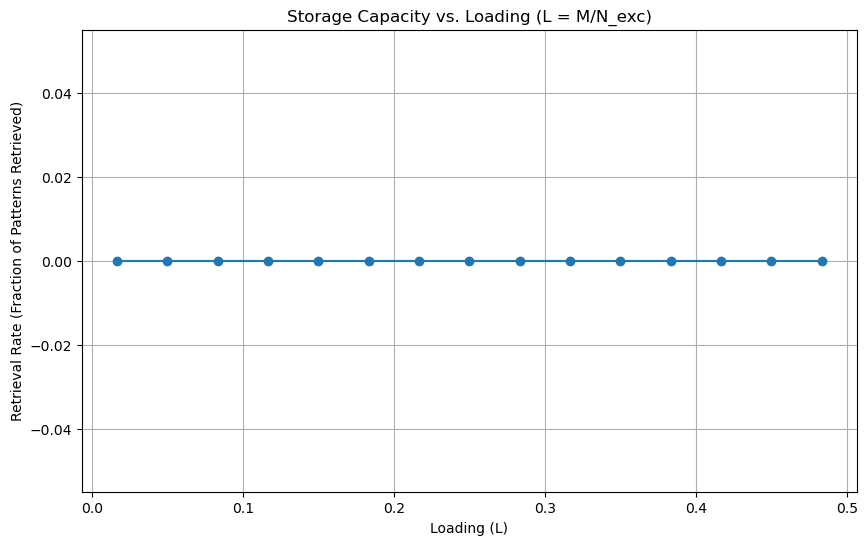

In [78]:
# Parameters for simulation
N_exc = 300  # Number of excitatory neurons
N_inh = 100  # Number of inhibitory neurons
patterns = [np.random.choice([0, 1], N_exc, p=[0.9, 0.1]) for _ in range(5)]  # Low-activity patterns
c = 1.0  # Scaling factor for weights
beta = 2  # Inverse temperature for the tanh function
T = 50  # Number of time steps
a = 0.1  # Activation threshold for the second inhibitory population

# Run the network simulation
S_exc, S_inh1, S_inh2 = simulate_network(N_exc, N_inh, patterns, c, beta, T, a)
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(loadings, retrieval_rates, marker='o')
plt.title('Storage Capacity vs. Loading (L = M/N_exc)')
plt.xlabel('Loading (L)')
plt.ylabel('Retrieval Rate (Fraction of Patterns Retrieved)')
plt.grid(True)
plt.show()

In [81]:

# Ex 3.5 Implement pattern retrieval with external input
# You would modify the simulation function to include external input when presenting patterns

import numpy as np
import matplotlib.pyplot as plt

def initialize_weights(N_exc, N_inh, patterns, c):
    """ Initialize weight matrices for E-E and E-I connections including a second inhibitory population """
    W_EE = np.zeros((N_exc, N_exc))
    W_IE = np.zeros((N_inh, N_exc))
    for pattern in patterns:
        W_EE += np.outer(pattern, pattern)
    W_EE *= c / N_exc
    W_IE.fill(1.0 / N_exc)  # Simplified for demonstration
    return W_EE, W_IE

def external_input(S_exc, pattern, J, M):
    """ Calculate the external input to the excitatory neurons based on the current pattern """
    return J * (pattern - np.mean(patterns, axis=0))

def update_network_with_input(S_exc, S_inh, W_EE, W_IE, beta, input):
    """ Update the network state with external input """
    H_exc = np.dot(W_EE, S_exc) - np.dot(W_IE.T, S_inh) + input
    H_inh = np.dot(W_IE, S_exc)
    S_exc = np.tanh(beta * H_exc)
    S_inh = np.tanh(beta * H_inh)
    return S_exc, S_inh

def simulate_pattern_presentation(N_exc, N_inh, patterns, c, beta, J, T, presentation_steps):
    S_exc_history = []
    """ Simulate the network with pattern presentations and external inputs """
    W_EE, W_IE = initialize_weights(N_exc, N_inh, patterns, c)
    S_exc = np.random.choice([0, 1], N_exc)
    S_inh = np.random.choice([0, 1], N_inh)
    pattern_order = np.random.permutation(len(patterns))

    for idx in pattern_order:
        current_pattern = patterns[idx]
        input = external_input(S_exc, current_pattern, J, len(patterns))
        for _ in range(presentation_steps):
            S_exc, S_inh = update_network_with_input(S_exc, S_inh, W_EE, W_IE, beta, input)
            S_exc_history.append(S_exc.copy())
        # Measure retrieval accuracy
        overlap = 1 - np.mean(np.abs(current_pattern - S_exc))  # Example measure of overlap
        print(f'Pattern {idx + 1}: Overlap after presentation = {overlap:.2f}')
    return np.array(S_exc_history)


Pattern 3: Overlap after presentation = 0.67
Pattern 1: Overlap after presentation = 0.59
Pattern 6: Overlap after presentation = 0.67
Pattern 7: Overlap after presentation = 0.68
Pattern 4: Overlap after presentation = 0.70
Pattern 9: Overlap after presentation = 0.69
Pattern 2: Overlap after presentation = 0.70
Pattern 5: Overlap after presentation = 0.69
Pattern 8: Overlap after presentation = 0.67
Pattern 10: Overlap after presentation = 0.68


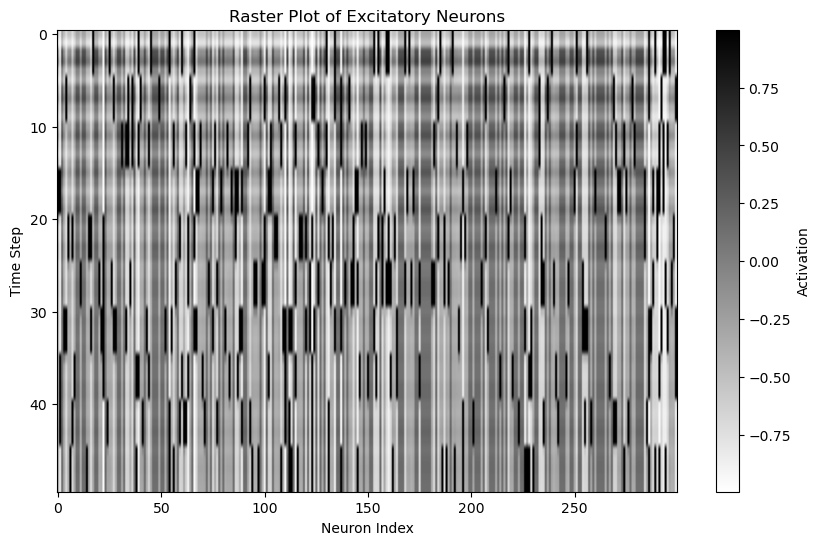

In [82]:
import matplotlib.pyplot as plt

def plot_raster(S_exc_history):
    plt.figure(figsize=(10, 6))
    plt.imshow(S_exc_history, aspect='auto', cmap='binary')
    plt.xlabel('Neuron Index')
    plt.ylabel('Time Step')
    plt.title('Raster Plot of Excitatory Neurons')
    plt.colorbar(label='Activation')
    plt.show()

# Parameters for simulation
N_exc = 300  # Number of excitatory neurons
N_inh = 100  # Number of inhibitory neurons
patterns = [np.random.choice([0, 1], N_exc, p=[0.9, 0.1]) for _ in range(10)]  # 10 low-activity patterns
c = 1.0  # Scaling factor for weights
beta = 2  # Inverse temperature
J = 2  # Strength of external input
T = 50  # Total time steps
presentation_steps = 5  # Time steps each pattern is presented

# Run the simulation
S_exc_history = simulate_pattern_presentation(N_exc, N_inh, patterns, c, beta, J, T, presentation_steps)
plot_raster(S_exc_history)
# Example usage (assuming S_exc_history is collected during simulation):
# plot_raster(S_exc_history)

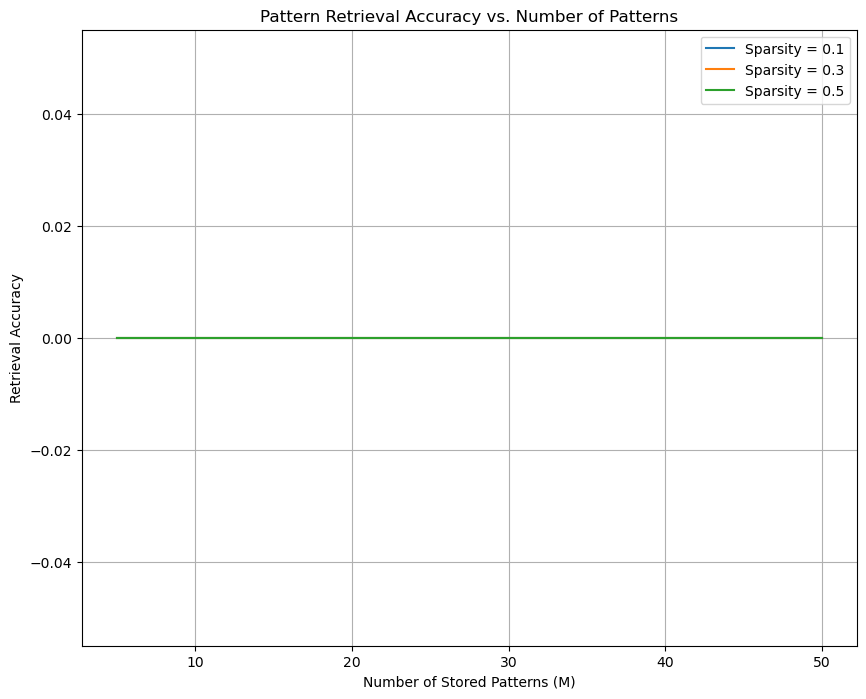

In [83]:
# Ex 3.6 Analyze the dependency of pattern retrieval on network loading and pattern properties
# This would involve running simulations with various network loadings and pattern properties and analyzing the results
import numpy as np
import matplotlib.pyplot as plt

def generate_patterns(N, M, sparsity):
    """Generate sparse binary patterns."""
    return np.random.choice([0, 1], size=(M, N), p=[1-sparsity, sparsity])

def initialize_weights(patterns, N):
    """Initialize weights using Hebbian learning."""
    W = np.zeros((N, N))
    for p in patterns:
        W += np.outer(p, p)
    np.fill_diagonal(W, 0)
    return W / N

def retrieve_pattern(W, pattern, iterations=100):
    """Asynchronously update the network to retrieve a pattern."""
    N = len(pattern)
    state = pattern.copy()
    for _ in range(iterations):
        for i in np.random.permutation(N):
            state[i] = 1 if np.dot(W[i], state) > 0 else 0
    return state

def pattern_retrieval_accuracy(patterns, W):
    """Measure how many patterns are retrieved accurately."""
    N = patterns.shape[1]
    successful_retrievals = 0
    for p in patterns:
        retrieved = retrieve_pattern(W, p)
        if np.array_equal(retrieved, p):
            successful_retrievals += 1
    return successful_retrievals / len(patterns)

# Network parameters
N = 100  # number of neurons
M_values = np.arange(5, 55, 5)  # different numbers of patterns
sparsity_values = [0.1, 0.3, 0.5]  # sparsity of the patterns

plt.figure(figsize=(10, 8))

for sparsity in sparsity_values:
    accuracies = []
    for M in M_values:
        patterns = generate_patterns(N, M, sparsity)
        W = initialize_weights(patterns, N)
        accuracy = pattern_retrieval_accuracy(patterns, W)
        accuracies.append(accuracy)
    plt.plot(M_values, accuracies, label=f'Sparsity = {sparsity}')

plt.xlabel('Number of Stored Patterns (M)')
plt.ylabel('Retrieval Accuracy')
plt.title('Pattern Retrieval Accuracy vs. Number of Patterns')
plt.legend()
plt.grid(True)
plt.show()

In [84]:

# Ex 3.7 (Bonus) Explore how to improve network capacity
# This could involve experimenting with network parameters, learning rules, or model structures to maximize capacity
def pseudoinverse_weights(patterns):
    """Calculate weights using the pseudoinverse rule."""
    P = np.vstack(patterns).T  # pattern matrix
    P_inv = np.linalg.pinv(P)  # pseudoinverse of the pattern matrix
    return np.dot(P, P_inv)

# Simulate with pseudoinverse weights
N = 100
M = 100  # Set M equal to N for demonstration
patterns = generate_patterns(N, M, 0.1)  # Sparse patterns
W = pseudoinverse_weights(patterns)
accuracy = pattern_retrieval_accuracy(patterns, W)

print(f'Retrieval accuracy with pseudoinverse weights for M=N={N}: {accuracy:.2f}')

Retrieval accuracy with pseudoinverse weights for M=N=100: 0.00
